Build Feedforward neural networks with Keras and TensorFlow for classification of 
CIFAR10 image dataset using the following steps: 
a. Import the necessary packages 
b. Load the training and testing data  
c. Define the network architecture using Keras  
d. Train the model using SGD/Adam optimizer 
e. Evaluate the network   
f. Plot the training loss and accuracy

In [1]:
# a. Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [2]:
# b. Load training + testing csv files
train_df = pd.read_csv("train_data.csv")
test_df  = pd.read_csv("test_data.csv")

# split X & y
X_train = train_df.drop(['label'], axis=1).values
y_train = train_df['label'].values

X_test  = test_df.drop(['label'], axis=1).values
y_test  = test_df['label'].values

# normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# one hot encode labels (10 classes)
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [3]:
# c. Define feedforward model architecture
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# choose optimizer → can use either SGD or Adam
#opt = Adam(learning_rate=0.001)      
opt = SGD(0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


C:\Users\SHUBHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# d. Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3173 - loss: 1.9214 - val_accuracy: 0.3716 - val_loss: 1.7884
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3828 - loss: 1.7435 - val_accuracy: 0.3710 - val_loss: 1.7578
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4111 - loss: 1.6619 - val_accuracy: 0.4140 - val_loss: 1.6529
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4315 - loss: 1.6032 - val_accuracy: 0.4140 - val_loss: 1.6380
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4494 - loss: 1.5600 - val_accuracy: 0.4290 - val_loss: 1.6239
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4622 - loss: 1.5206 - val_accuracy: 0.4605 - val_loss: 1.5337
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4758 - loss: 1.4864 - val_accuracy: 0.4650 - val_loss: 1.5181
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4866 - loss: 1.4558 - val_accuracy: 0.

In [5]:
# e. Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5102 - loss: 1.3954
Test Loss: 1.395433783531189
Test Accuracy: 0.510200023651123


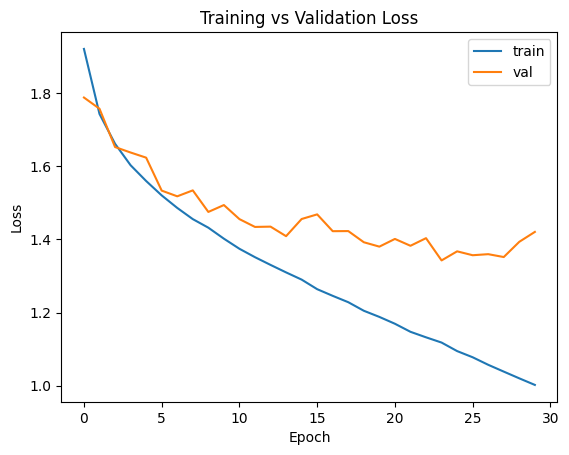

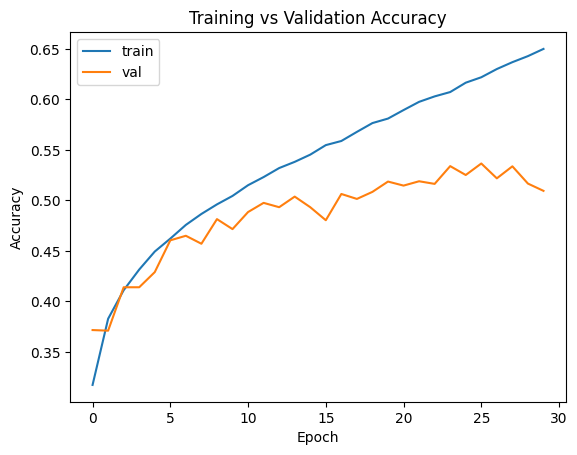

In [6]:
# f. Plot training loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train","val"])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train","val"])
plt.show()